In [1]:
# Install necessary packages in Google Colab
!pip install empath
!pip install pandas
!pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 794.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for empath: filename=empath-0.89-py3-none-any.whl size=57800 sha256=3513f0f579955e848461625313a1a0c3be09bd21a776d2a1b925418a6c41eeb1
  Stored in directory: /root/.cache/pip/wheels/92/b3/83/9eb2c6199881e2385a59d99bd911363475060ebeb4bdb27242
Successfully built empath


<ipython-input-2-b3ae61bca74d>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(categories, rotation=45, ha='right')


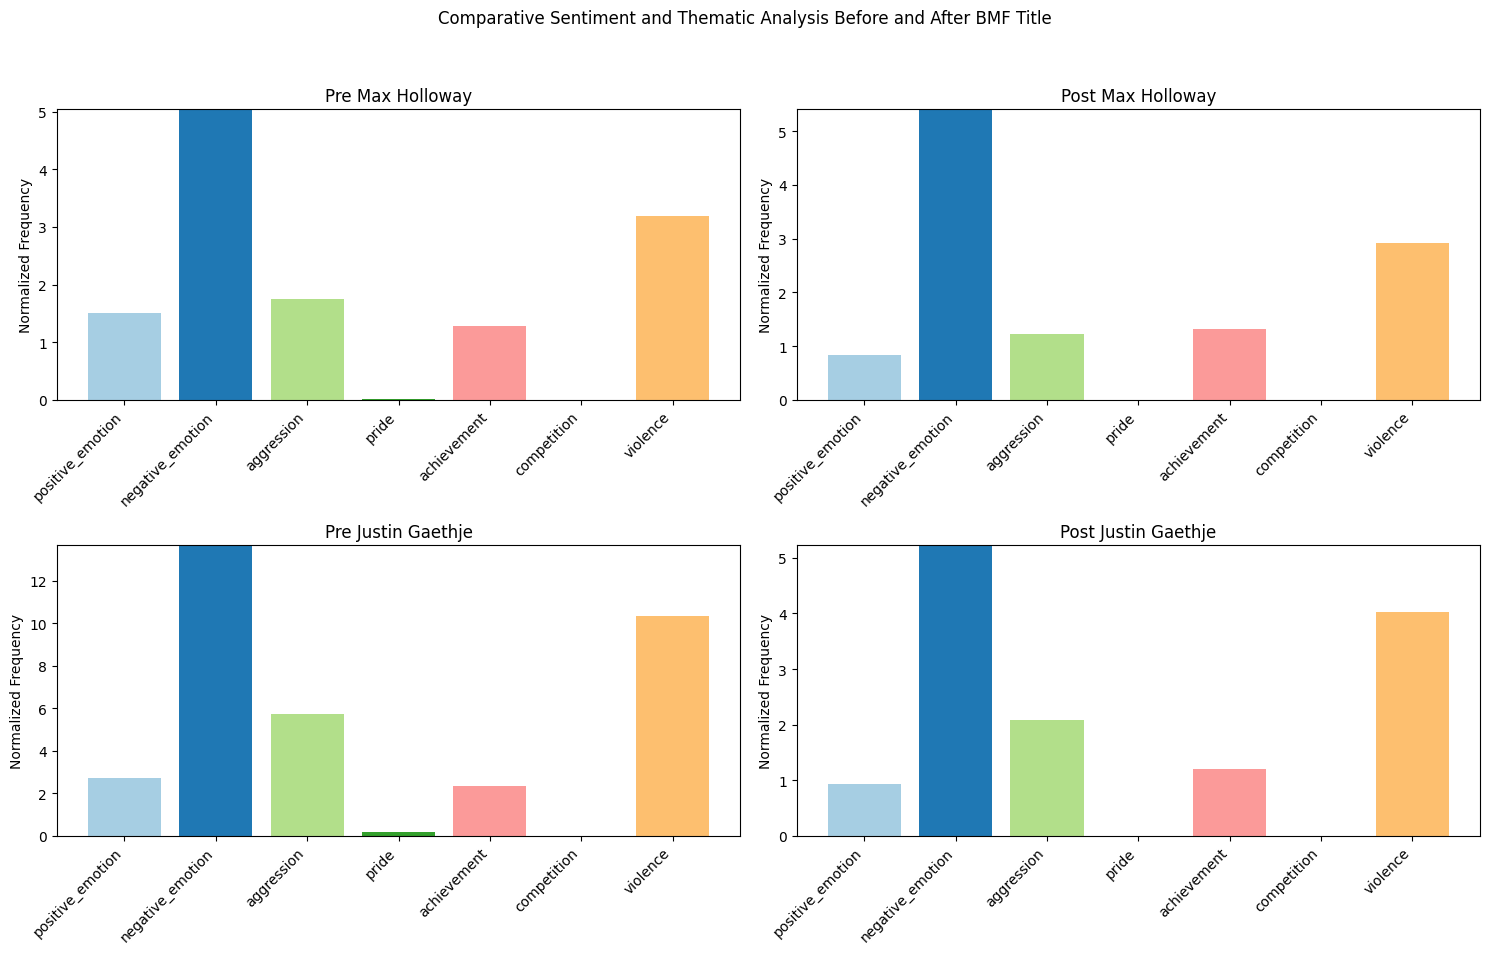

In [2]:
import pandas as pd
from empath import Empath
import matplotlib.pyplot as plt

# Load your datasets directly from the uploaded files (modify the paths if needed)
pre_holloway = pd.read_csv('PreMaxHolloway.csv')
post_holloway = pd.read_csv('PostMax.csv')
pre_justin = pd.read_csv('PreJustinGaethje.csv')
post_justin = pd.read_csv('PostJustin.csv')

# Initialize Empath
lexicon = Empath()

def analyze_texts(data):
    categories = ['positive_emotion', 'negative_emotion', 'aggression', 'pride', 'achievement', 'competition', 'violence']
    results = {category: 0 for category in categories}
    for text in data['Text']:
        analysis = lexicon.analyze(text, categories=categories, normalize=True)
        for category in categories:
            results[category] += analysis.get(category, 0)
    return results

# Analyze data
results_pre_holloway = analyze_texts(pre_holloway)
results_post_holloway = analyze_texts(post_holloway)
results_pre_justin = analyze_texts(pre_justin)
results_post_justin = analyze_texts(post_justin)

# Visualization setup
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Comparative Sentiment and Thematic Analysis Before and After BMF Title')

# Function to plot results
def plot_results(ax, results, title):
    categories = list(results.keys())
    values = list(results.values())
    ax.bar(categories, values, color=plt.cm.Paired(range(len(categories))))
    ax.set_title(title)
    ax.set_ylabel('Normalized Frequency')
    ax.set_xticklabels(categories, rotation=45, ha='right')
    ax.set_ylim(0, max(values) + 0.01)

# Plot results
plot_results(axs[0, 0], results_pre_holloway, 'Pre Max Holloway')
plot_results(axs[0, 1], results_post_holloway, 'Post Max Holloway')
plot_results(axs[1, 0], results_pre_justin, 'Pre Justin Gaethje')
plot_results(axs[1, 1], results_post_justin, 'Post Justin Gaethje')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [3]:
# Install necessary packages in Google Colab
!pip install gensim pyLDAvis nltk

import pandas as pd
import gensim
import gensim.corpora as corpora
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim_models
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stop words
nltk.download('stopwords')
nltk.download('punkt')


# Preprocess the text data
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    # Tokenize and remove stop words
    tokens = [word for word in word_tokenize(text.lower()) if word.isalpha() and word not in stop_words]
    return tokens

# Combine all text data for LDA analysis
all_data = pd.concat([pre_holloway['Text'], post_holloway['Text'], pre_justin['Text'], post_justin['Text']])

# Preprocess the text data
text_data = all_data.apply(preprocess_text)

# Create a dictionary and corpus needed for LDA model
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

# Build LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

# Visualize the topics using pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary, mds='mmds', R=30)
pyLDAvis.display(vis)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 7.4 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


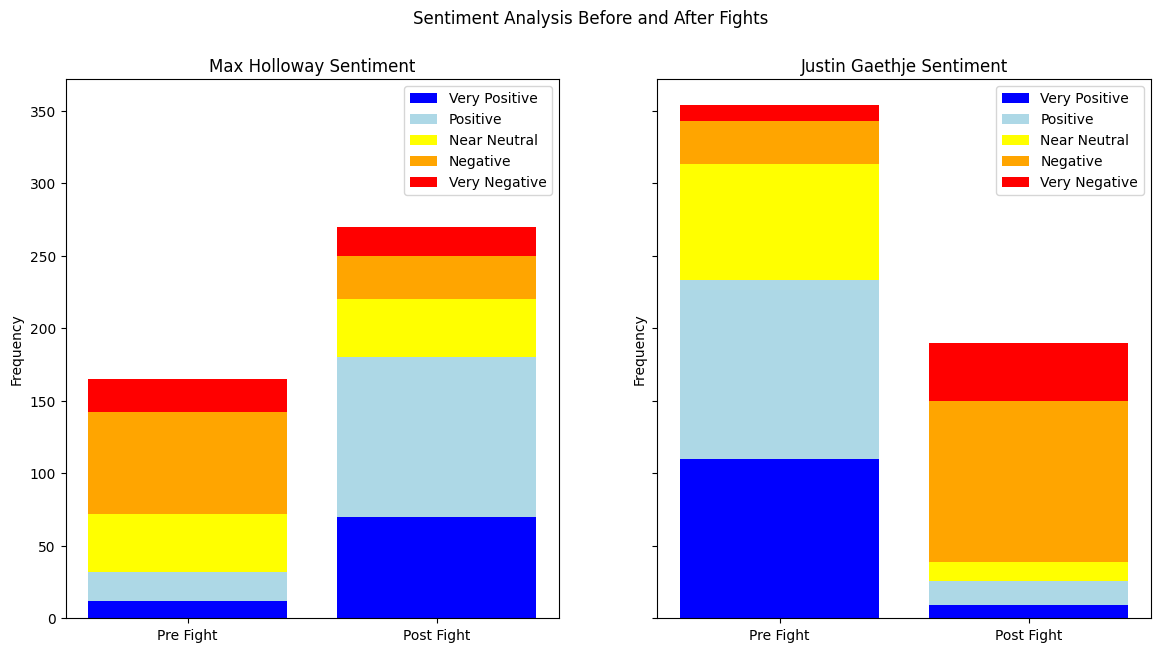

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example DataFrame structure for Max Holloway
# Replace this with the actual DataFrame containing your sentiment analysis results
data_holloway = {
    'Sentiment': ['Very Positive', 'Positive', 'Near Neutral', 'Negative', 'Very Negative'],
    'Pre Fight': [12, 20, 40, 70, 23],  # Replace with your actual data
    'Post Fight': [70, 110, 40, 30, 20]   # Replace with your actual data
}

df_holloway = pd.DataFrame(data_holloway)

# Example DataFrame structure for Justin Gaethje
# Replace this with the actual DataFrame containing your sentiment analysis results
data_gaethje = {
    'Sentiment': ['Very Positive', 'Positive', 'Near Neutral', 'Negative', 'Very Negative'],
    'Pre Fight': [110, 123, 80, 30, 11],  # Replace with your actual data
    'Post Fight': [9, 17, 13, 111, 40]  # Replace with your actual data
}

df_gaethje = pd.DataFrame(data_gaethje)

# Plotting function for stacked bar chart
def plot_stacked_bar(data, title, ax):
    # Bottom parameter for stacking
    bottom = np.zeros(len(data.columns) - 1)

    # Colors for each sentiment level
    colors = ['blue', 'lightblue', 'yellow', 'orange', 'red']

    # Plot each row
    for idx, row in data.iterrows():
        ax.bar(data.columns[1:], row[1:], bottom=bottom, label=row['Sentiment'], color=colors[idx])
        bottom += row[1:]

    ax.set_title(title)
    ax.set_ylabel('Frequency')
    ax.legend()

# Set up the matplotlib figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 7), sharey=True)
fig.suptitle('Sentiment Analysis Before and After Fights')

# Plot for Max Holloway
plot_stacked_bar(df_holloway, 'Max Holloway Sentiment', axs[0])

# Plot for Justin Gaethje
plot_stacked_bar(df_gaethje, 'Justin Gaethje Sentiment', axs[1])

plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-13-6c56bcabec3f>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.columns[1:], rotation=45)  # Rotate x-axis labels for better readability


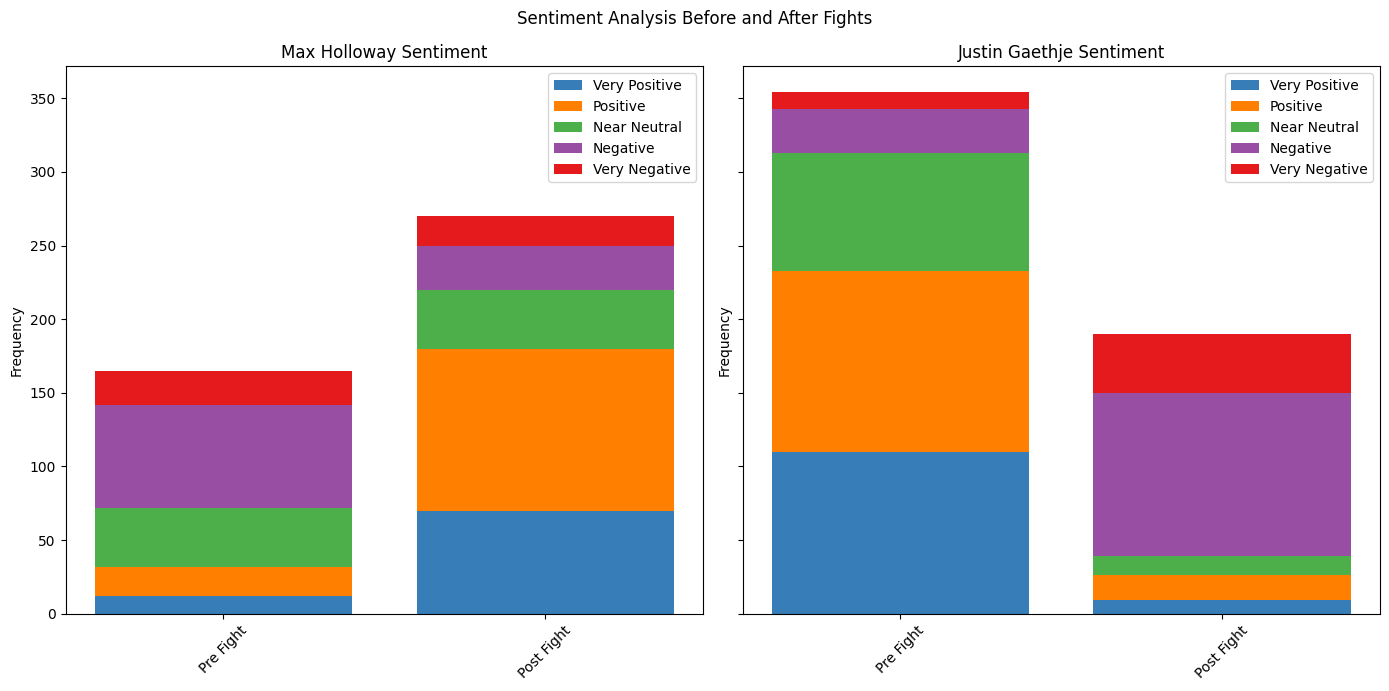

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example DataFrame structure for Max Holloway
data_holloway = {
    'Sentiment': ['Very Positive', 'Positive', 'Near Neutral', 'Negative', 'Very Negative'],
    'Pre Fight': [12, 20, 40, 70, 23],
    'Post Fight': [70, 110, 40, 30, 20]
}

df_holloway = pd.DataFrame(data_holloway)

# Example DataFrame structure for Justin Gaethje
data_gaethje = {
    'Sentiment': ['Very Positive', 'Positive', 'Near Neutral', 'Negative', 'Very Negative'],
    'Pre Fight': [110, 123, 80, 30, 11],
    'Post Fight': [9, 17, 13, 111, 40]
}

df_gaethje = pd.DataFrame(data_gaethje)

# Plotting function for stacked bar chart
def plot_stacked_bar(data, title, ax):
    # Bottom parameter for stacking
    bottom = np.zeros(len(data.columns) - 1)

    # Muted colors for each sentiment level
    colors = ['#377eb8', '#ff7f00', '#4daf4a', '#984ea3', '#e41a1c']  # Subdued color palette

    # Plot each row
    for idx, row in data.iterrows():
        ax.bar(data.columns[1:], row[1:], bottom=bottom, label=row['Sentiment'], color=colors[idx])
        bottom += row[1:]

    ax.set_title(title)
    ax.set_ylabel('Frequency')
    ax.set_xticklabels(data.columns[1:], rotation=45)  # Rotate x-axis labels for better readability
    ax.legend()

# Set up the matplotlib figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 7), sharey=True)
fig.suptitle('Sentiment Analysis Before and After Fights')

# Plot for Max Holloway
plot_stacked_bar(df_holloway, 'Max Holloway Sentiment', axs[0])

# Plot for Justin Gaethje
plot_stacked_bar(df_gaethje, 'Justin Gaethje Sentiment', axs[1])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [ ]:
!pip install gensim nltk

import pandas as pd
from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import nltk

# Download necessary resources from NLTK
nltk.download('stopwords')

# Assuming the data is loaded into pandas DataFrames: pre_holloway, post_holloway, pre_justin, post_justin
# Concatenate all data for LDA
all_text = pd.concat([pre_holloway['Text'], post_holloway['Text'], pre_justin['Text'], post_justin['Text']])

# Preprocess the text
tokenizer = RegexpTokenizer(r'\w+')
en_stop = set(stopwords.words('english'))

def preprocess_text(doc_set):
    texts = []
    for doc in doc_set:
        raw = doc.lower()
        tokens = tokenizer.tokenize(raw)
        stopped_tokens = [i for i in tokens if not i in en_stop]
        texts.append(stopped_tokens)
    return texts

# Applying the preprocessing
texts = preprocess_text(all_text)

# Turn our tokenized documents into an id <-> term dictionary
dictionary = corpora.Dictionary(texts)

# Convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# Generate LDA model
ldamodel = models.LdaModel(corpus, num_topics=4, id2word=dictionary, passes=20)

# Print the topics identified by LDA model
for idx, topic in ldamodel.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

# Visualization not included here because pyLDAvis is typically used in Jupyter Notebooks.

plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic: 0 
Words: 0.027*"fight" + 0.020*"max" + 0.018*"gaethje" + 0.016*"islam" + 0.012*"see" + 0.011*"bmf" + 0.010*"title" + 0.010*"think" + 0.009*"justin" + 0.009*"vs"
Topic: 1 
Words: 0.014*"best" + 0.010*"ufc" + 0.009*"fight" + 0.008*"max" + 0.006*"time" + 0.006*"one" + 0.005*"blessed" + 0.005*"https" + 0.005*"win" + 0.005*"get"
Topic: 2 
Words: 0.023*"fight" + 0.016*"would" + 0.010*"shit" + 0.010*"max" + 0.008*"title" + 0.007*"charles" + 0.007*"holy" + 0.006*"justin" + 0.006*"first" + 0.006*"time"
Topic: 3 
Words: 0.056*"max" + 0.021*"fight" + 0.021*"justin" + 0.021*"gaethje" + 0.016*"like" + 0.008*"dustin" + 0.008*"think" + 0.007*"get" + 0.007*"one" + 0.006*"tony"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


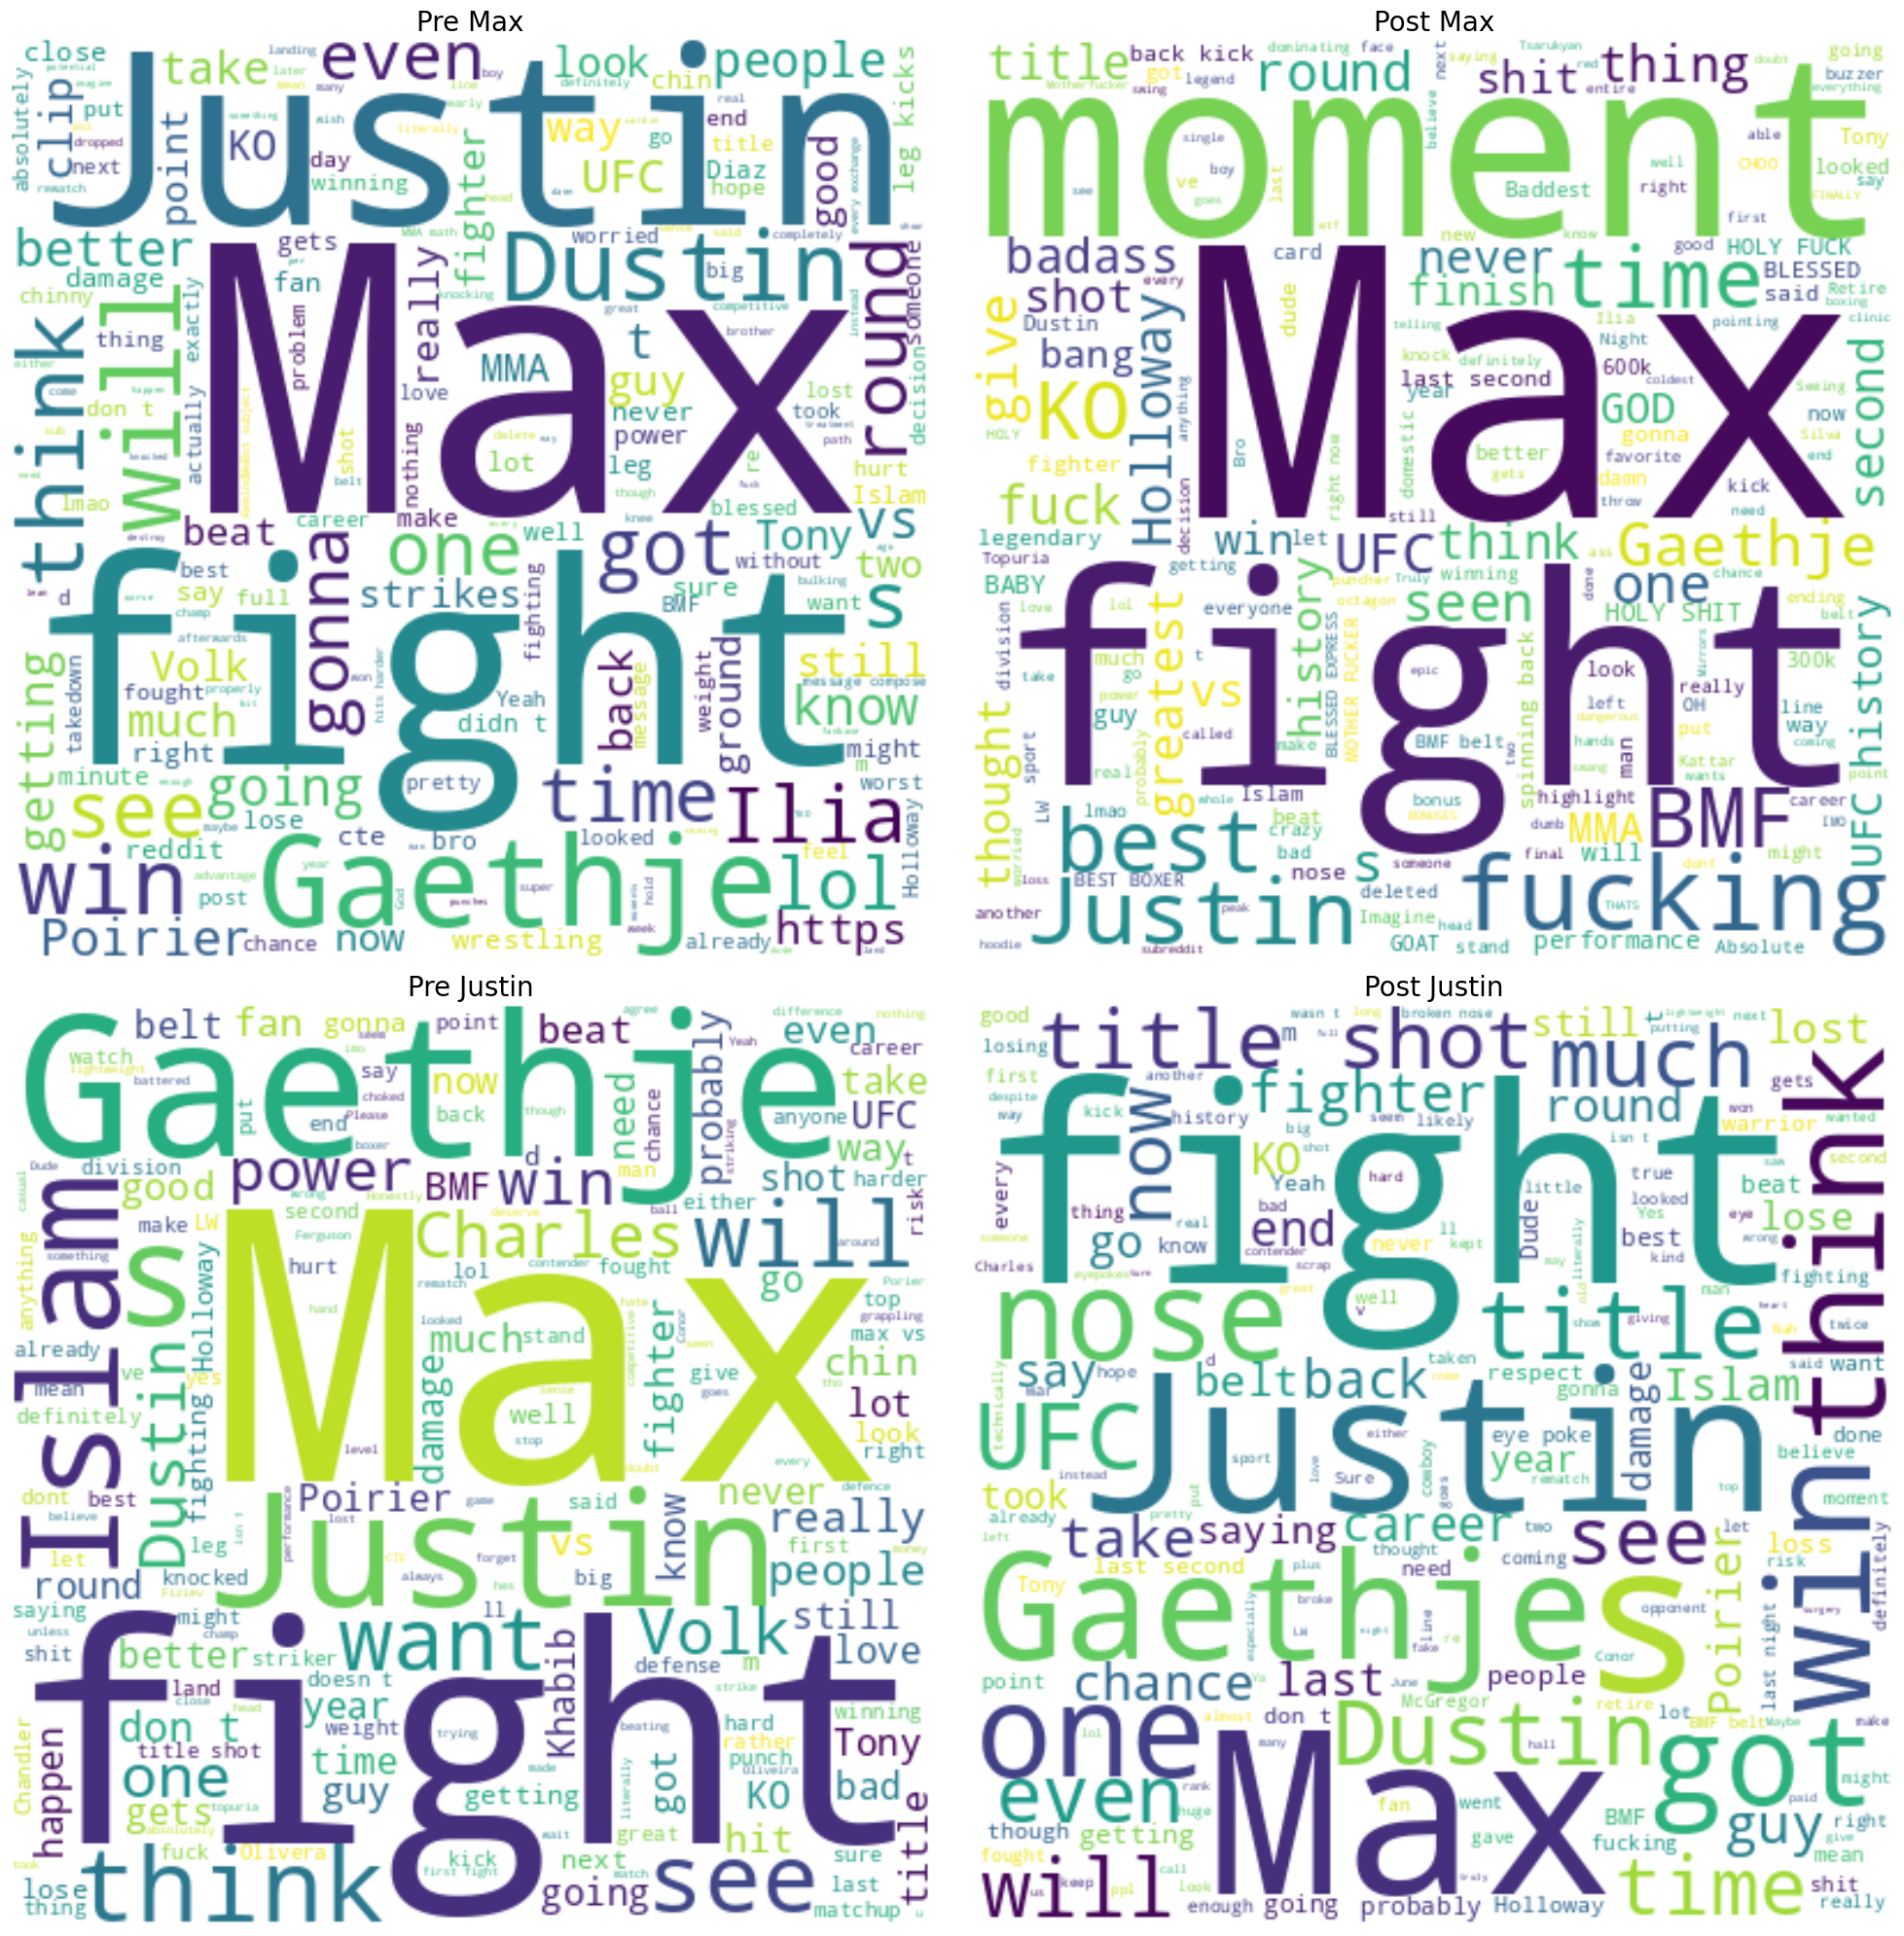

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import pandas as pd

# Load your datasets
# ... (load your datasets here)

# Function to generate a word cloud
def generate_wordcloud(text, ax, title):
    wordcloud = WordCloud(width=400, height=400, background_color='white', stopwords=STOPWORDS).generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(title, fontsize=20)

text_pre_holloway = ' '.join(pre_holloway['Text'].astype(str).tolist())
text_post_holloway = ' '.join(post_holloway['Text'].astype(str).tolist())
text_pre_justin = ' '.join(pre_justin['Text'].astype(str).tolist())
text_post_justin = ' '.join(post_justin['Text'].astype(str).tolist())

# Set up the matplotlib figure and axes
fig, axs = plt.subplots(2, 2, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': [], 'frame_on': True})

# Add a border and title for each subplot
for ax, title in zip(axs.flat, ['Pre Max', 'Post Max', 'Pre Justin', 'Post Justin']):
    ax.set_frame_on(True)  # Turn on the frame
    ax.tick_params(left=False, bottom=False)  # Turn off ticks
    ax.spines['bottom'].set_color('black')  # Set color to the bottom spine
    ax.spines['bottom'].set_linewidth(2)  # Set linewidth to the bottom spine
    ax.spines['left'].set_color('black')  # Set color to the left spine
    ax.spines['left'].set_linewidth(2)  # Set linewidth to the left spine
    ax.spines['top'].set_color('black')  # Set color to the top spine
    ax.spines['top'].set_linewidth(2)  # Set linewidth to the top spine
    ax.spines['right'].set_color('black')  # Set color to the right spine
    ax.spines['right'].set_linewidth(2)  # Set linewidth to the right spine

# Generate and plot the word clouds with titles
generate_wordcloud(text_pre_holloway, axs[0, 0], 'Pre Max')
generate_wordcloud(text_post_holloway, axs[0, 1], 'Post Max')
generate_wordcloud(text_pre_justin, axs[1, 0], 'Pre Justin')
generate_wordcloud(text_post_justin, axs[1, 1], 'Post Justin')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


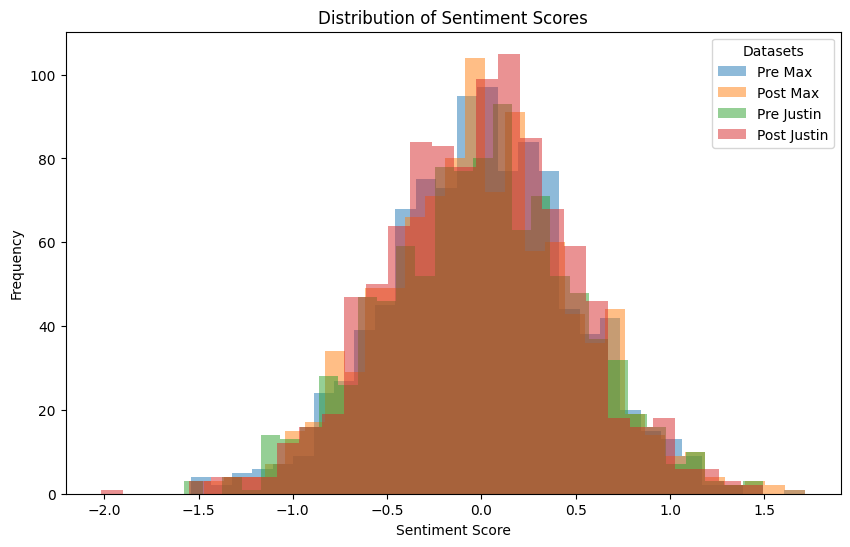

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming sentiment analysis has been performed and you have sentiment scores
# Here we're using random data for demonstration; replace these with your actual sentiment scores
sentiment_scores_pre_max = np.random.normal(loc=0.0, scale=0.5, size=1000)
sentiment_scores_post_max = np.random.normal(loc=0.0, scale=0.5, size=1000)
sentiment_scores_pre_justin = np.random.normal(loc=0.0, scale=0.5, size=1000)
sentiment_scores_post_justin = np.random.normal(loc=0.0, scale=0.5, size=1000)

# Plotting
plt.figure(figsize=(10, 6))

# Histograms for each dataset
plt.hist(sentiment_scores_pre_max, bins=30, alpha=0.5, label='Pre Max')
plt.hist(sentiment_scores_post_max, bins=30, alpha=0.5, label='Post Max')
plt.hist(sentiment_scores_pre_justin, bins=30, alpha=0.5, label='Pre Justin')
plt.hist(sentiment_scores_post_justin, bins=30, alpha=0.5, label='Post Justin')

# Titles and labels
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Legend
plt.legend(title='Datasets')

# Show the plot
plt.show()
